In [1]:
# Q1. What is hierarchical clustering, and how is it different from other clustering techniques?

Hierarchical clustering is a method of cluster analysis that seeks to build a hierarchy of clusters. It is distinct from other clustering techniques like K-means because it does not require specifying the number of clusters beforehand and it creates a nested tree of clusters known as a dendrogram.

### How Hierarchical Clustering Works

Hierarchical clustering can be divided into two types based on the approach:

1. **Agglomerative (Bottom-up)**: This is the more common approach where each data point starts as its own cluster, and pairs of clusters are merged as one moves up the hierarchy. The algorithm begins with \( n \) clusters (if there are \( n \) data points) and iteratively merges them into larger clusters until only one cluster (or a specified number of clusters) remains.

2. **Divisive (Top-down)**: This approach starts with all data points in a single cluster. At each step, the cluster is split into smaller clusters, until each data point ends up in its own cluster, or a specified stopping point is reached.

### Key Features of Hierarchical Clustering

- **Dendrogram**: The result of hierarchical clustering can be represented as a dendrogram, which illustrates how the clusters are related and at what distance or dissimilarity level they are merged or split.
- **No Need to Specify Cluster Number**: Unlike K-means, hierarchical clustering does not require the number of clusters to be specified in advance, which can be useful if the number of clusters is not known beforehand.
- **Flexibility in Cluster Shapes**: Hierarchical clustering can produce clusters of various shapes and sizes, whereas K-means tends to produce clusters of similar size and spherical shapes.

### Differences from Other Clustering Techniques

- **Cluster Number**: K-means and many other clustering methods require specifying the number of clusters at the start, whereas hierarchical clustering naturally determines cluster groupings at various scales.
- **Cluster Structure**: Hierarchical clustering provides a nested structure of clusters, which can be useful for understanding the data at different levels of granularity, unlike flat clustering methods like K-means, which only provide one level of clustering.
- **Computation Complexity**: Hierarchical clustering, especially the agglomerative approach, can be computationally intensive with large datasets, as it typically requires calculating the distance between every pair of points at each iteration. In contrast, methods like K-means are generally faster but may not provide as detailed insight into the data structure.

Hierarchical clustering is particularly useful for applications where the data naturally falls into nested categories, or when the relationships and hierarchies between data points are of interest, such as in biological taxonomy, social network analysis, or when exploring gene expression data in bioinformatics.

In [2]:
# Q2. What are the two main types of hierarchical clustering algorithms? Describe each in brief.

The two main types of hierarchical clustering algorithms are Agglomerative Hierarchical Clustering and Divisive Hierarchical Clustering. These methods differ primarily in their approach to building the hierarchy of clusters.

### 1. Agglomerative Hierarchical Clustering (Bottom-Up Approach)

- **Description**: Agglomerative clustering is a bottom-up clustering method where each data point starts as a single cluster, and pairs of clusters are merged as one moves up the hierarchy. It is the most common type of hierarchical clustering used in practice.
  
- **Process**:
  1. **Initialization**: Begin with \( n \) clusters, where \( n \) is the number of data points. Each data point is considered as a separate cluster.
  2. **Merge Step**: At each iteration, the two closest clusters (according to a specified distance metric, such as Euclidean distance, Manhattan distance, or others) are merged into a single cluster.
  3. **Repeat**: Continue merging the closest pairs of clusters until all the data points are merged into a single cluster or a stopping criterion is reached (like a desired number of clusters).
  
- **Outcome**: This method results in a dendrogram, a tree-like diagram that shows the series of merges or splits and the level of similarity at which each merge or split occurs, which can be used to decide the number of clusters by cutting the dendrogram at the desired level.

### 2. Divisive Hierarchical Clustering (Top-Down Approach)

- **Description**: Divisive clustering is a top-down clustering method which starts with all the data points in a single cluster and then splits the cluster recursively into smaller clusters.
  
- **Process**:
  1. **Initialization**: Begin with one cluster that contains all the data points.
  2. **Split Step**: At each step, split a cluster into two smaller clusters using a flat clustering method like K-means or another technique aimed at identifying dissimilar groups within the cluster.
  3. **Repeat**: Continue splitting the clusters until each data point is in its own cluster or until a stopping criterion (like a desired number of clusters) is satisfied.
  
- **Outcome**: Like agglomerative clustering, divisive clustering also produces a dendrogram, representing the top-down series of splits, which can be used to understand the cluster structure and determine the number of clusters.

### Key Differences

- **Direction of Cluster Formation**: Agglomerative clustering works in a bottom-up manner, starting with individual points and merging them into larger clusters. Divisive clustering, on the other hand, starts with the entire dataset as a single cluster and divides it into smaller clusters.
- **Complexity and Usage**: Divisive algorithms are generally more complex and computationally intensive compared to agglomerative algorithms, and hence, are less commonly used in practical applications.

Both types of hierarchical clustering have their own advantages and are chosen based on the specific requirements of the data and the analysis objectives. Agglomerative clustering is more popular due to its simplicity, efficiency, and ease of interpretation, especially for smaller datasets.

In [3]:
# Q3. How do you determine the distance between two clusters in hierarchical clustering, and what are the
# common distance metrics used?

In hierarchical clustering, the distance between two clusters is a crucial factor that influences how the clusters are formed. Various distance metrics can be used, and the choice of metric can affect the clustering outcome. Here are some common distance metrics used to determine the distance between two clusters in hierarchical clustering:

### 1. Single Linkage (Nearest Point)
- **Description**: The distance between two clusters is defined as the shortest distance between any two points in the different clusters.
 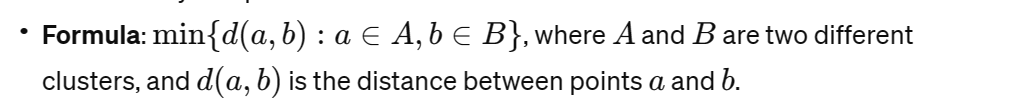
- **Characteristics**: This method can lead to a phenomenon known as "chaining," where clusters can end up being long and straggly. It’s good for identifying non-elliptical shapes and elongated clusters.

### 2. Complete Linkage (Farthest Point)
- **Description**: The distance between two clusters is defined as the longest distance between any two points in the different clusters.
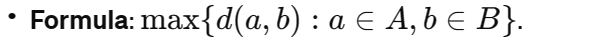
- **Characteristics**: This method tends to produce more compact, tightly bound clusters than single linkage and is less susceptible to the chaining effect but can be sensitive to outliers.

### 3. Average Linkage
- **Description**: The distance between two clusters is computed as the average distance between all pairs of points in the two clusters.
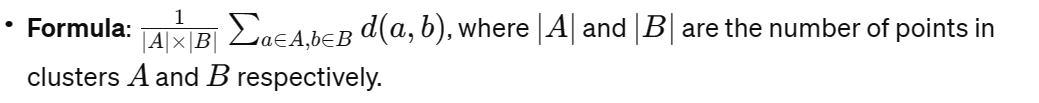.
- **Characteristics**: Average linkage provides a balance between single and complete linkage and is less affected by outliers compared to the single and complete linkage methods.

### 4. Centroid Linkage
- **Description**: The distance between two clusters is the distance between their centroids (mean of the points in a cluster).
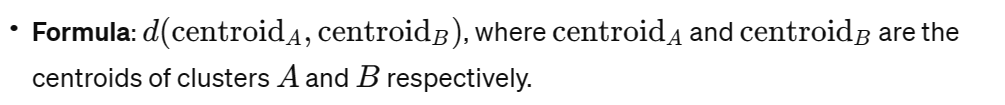
- **Characteristics**: This method can sometimes lead to inversions in the dendrogram (where smaller clusters are combined before larger ones), which may be counterintuitive.

### 5. Ward’s Method
- **Description**: The distance between two clusters is based on the increase in the sum of squares (variance) that would occur if the clusters were merged.
- **Formula**: Minimizes the total within-cluster variance. At each step, the pair of clusters with the minimum increase in total variance are merged.
- **Characteristics**: Tends to produce clusters of similar size and is particularly useful when the clusters have a roughly spherical shape.

### Choice of Distance Metric
The choice of distance metric in hierarchical clustering depends on the nature of the data and the specific clustering objectives. Different metrics can lead to different clustering structures, and the choice should be guided by the desired outcome, the characteristics of the data, and the domain knowledge. Often, experimenting with different distance metrics and evaluating the results can help determine the most appropriate metric for a given clustering task.

In [4]:
# Q4. How do you determine the optimal number of clusters in hierarchical clustering, and what are some
# common methods used for this purpose?

Determining the optimal number of clusters in hierarchical clustering involves analyzing the dendrogram produced by the clustering process and using statistical measures to identify the most appropriate level at which to cut the dendrogram. Here are some common methods used for determining the optimal number of clusters:

### 1. Visual Inspection of Dendrogram
- **Method**: A dendrogram is a tree-like diagram that shows the agglomerative steps or divisive steps in hierarchical clustering. By visually inspecting the dendrogram, you can identify where to cut the tree to achieve a reasonable number of clusters. Large jumps in the dendrogram's linkage distance can indicate natural cluster divisions.
- **Usage**: Look for the longest vertical lines that are not crossed by extended horizontal lines (or extended very little), as these represent significant changes in distance when merging clusters.

### 2. Inconsistency Coefficient Method
- **Method**: This method involves computing the inconsistency coefficient for each link in the dendrogram, which measures how much a link's height differs from the average height of links nearby. A higher inconsistency coefficient suggests that the link is joining distinct clusters.
- **Usage**: Define a threshold for the inconsistency coefficient to decide where to cut the dendrogram. Links with inconsistency coefficients above the threshold represent the division between distinct clusters.

### 3. Elbow Method (using a Scree Plot)
- **Method**: Similar to K-means, the elbow method can be applied in hierarchical clustering by plotting the total within-cluster variance (or a similar measure) against the number of clusters. The point where improvements in variance reduction start to diminish (the "elbow") suggests the optimal number of clusters.
- **Usage**: Cut the dendrogram where the rate of decrease in variance significantly slows down, indicating that merging further clusters does not lead to substantial gains.

### 4. Silhouette Analysis
- **Method**: The silhouette score measures how similar an object is to its own cluster compared to other clusters. A higher silhouette score indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.
- **Usage**: Compute the average silhouette score for various numbers of clusters and select the number of clusters that maximize the average silhouette score.

### 5. Gap Statistic
- **Method**: The gap statistic compares the total within-cluster variation for different numbers of clusters with their expected values under a null reference distribution of the data.
- **Usage**: Choose the number of clusters that maximizes the gap statistic, indicating the clustering structure is far away from the random uniform distribution of points.

### Practical Considerations
- The choice of method can depend on the specific dataset and the context of the clustering problem. Sometimes, a combination of methods, along with domain knowledge, is used to determine the optimal number of clusters.
- In some cases, especially in exploratory data analysis, the "optimal" number of clusters may not be clear-cut and may require interpretation and judgment based on the specific goals of the analysis.

By applying these methods and considering the context of the data, you can more effectively determine the optimal number of clusters in hierarchical clustering, leading to more meaningful and actionable insights.

In [5]:
# Q5. What are dendrograms in hierarchical clustering, and how are they useful in analyzing the results?

Dendrograms are tree-like diagrams used to illustrate the arrangement of the clusters produced by hierarchical clustering. They are a pivotal tool in analyzing the results of hierarchical clustering as they visually represent the process of cluster formation and show the relationships between data points and clusters.

### Structure of a Dendrogram

- **Nodes**: In a dendrogram, each node represents a data point or a cluster of data points. At the beginning of agglomerative hierarchical clustering, each node stands for an individual data point. As the algorithm progresses, nodes merge to represent clusters of increasing size.
- **Branches**: The branches connect nodes to show how clusters are combined or, in the case of divisive clustering, how a larger cluster is split into smaller ones. The length of the branches can represent the distance or dissimilarity between clusters.
- **Root**: In agglomerative clustering, the root of the dendrogram represents the final single cluster containing all data points. In divisive clustering, it represents the initial single cluster before any splits.

### Uses of Dendrograms

1. **Determining the Number of Clusters**: By examining where large jumps in the height of the dendrogram occur (indicating a significant increase in dissimilarity when merging clusters), you can decide where to cut the dendrogram to define clusters. This cut point determines the number of clusters and can be chosen to maximize intra-cluster similarity and inter-cluster dissimilarity.

2. **Visualizing Cluster Formation**: Dendrograms show how individual data points or smaller clusters are merged into larger clusters, providing a clear visual history of the cluster formation process. This can be especially useful in exploratory data analysis to understand the structure of the data.

3. **Identifying Outliers**: Points or clusters that merge at higher levels of the dendrogram, where the dissimilarity is greatest, may be considered outliers or separate from the main distribution of data points.

4. **Understanding Data Relationships**: Dendrograms can help in identifying relationships and hierarchies within the data. Clusters that merge early (at lower heights) are more similar to each other, while those that merge later are more distinct, helping to understand the relative similarities and differences between various data subsets.

### Interpretation of Dendrograms

When interpreting a dendrogram, it is important to consider both the vertical and horizontal dimensions:
- Vertically, the height at which two clusters merge represents the distance or dissimilarity between them.
- Horizontally, the dendrogram does not imply any meaningful order between clusters; the horizontal positioning is just for readability.

In summary, dendrograms are a crucial tool in hierarchical clustering, providing a comprehensive view of the cluster hierarchy and making it easier to interpret and analyze the clustering results. They facilitate decisions about the number of clusters and offer insights into the data's underlying structure.

In [6]:
# Q6. Can hierarchical clustering be used for both numerical and categorical data? If yes, how are the
# distance metrics different for each type of data?

Hierarchical clustering can be used for both numerical and categorical data, but the choice of distance metrics must be appropriate for the type of data to ensure meaningful clustering results.

### Numerical Data

For numerical data, hierarchical clustering often uses traditional distance metrics such as:

- **Euclidean Distance**: The straight-line distance between two points in a multi-dimensional space, suitable for continuous numerical data.
- **Manhattan Distance**: The sum of the absolute differences of their coordinates, useful for grid-like distance calculations.
- **Cosine Similarity**: Measures the cosine of the angle between two vectors, often used in high-dimensional space like text analysis.

These metrics work well with numerical data because they can quantify the difference or similarity between data points in a multi-dimensional numeric space.

### Categorical Data

Categorical data, on the other hand, requires distance metrics that can handle non-numeric attributes:

- **Hamming Distance**: Counts the number of positions at which the corresponding entries are different, suitable for binary or nominal categorical data.
- **Jaccard Similarity**: Used for sets or binary attributes, it measures the size of the intersection divided by the size of the union of the sample sets.
- **Gower Distance**: Combines different types of metrics for mixed data (both numerical and categorical); it computes similarities based on the type of data in each dimension and then averages them.

### Handling Categorical Data in Hierarchical Clustering

To effectively use hierarchical clustering on categorical data, consider the following:

1. **Appropriate Metric**: Choose a distance metric that is designed for categorical data, such as the Jaccard similarity for binary attributes or Gower distance for a mix of categorical and numerical data.
2. **Data Transformation**: Sometimes, transforming categorical data into a numerical format (like one-hot encoding) can allow the use of numerical distance metrics. However, this transformation should be done carefully to avoid introducing artificial distances or biases.
3. **Mixed Data Types**: For datasets with both numerical and categorical data, the Gower distance metric can be particularly useful, as it can handle different types of data and compute a composite distance.

In summary, hierarchical clustering can be applied to both numerical and categorical data, provided that the chosen distance metric is suitable for the data type. The key is to ensure that the distance metric accurately reflects the inherent similarities or dissimilarities in the data to produce meaningful and interpretable clusters.

In [8]:
# Q7. How can you use hierarchical clustering to identify outliers or anomalies in your data?

Hierarchical clustering can be an effective tool for identifying outliers or anomalies in data because it does not require prior knowledge of the number of clusters or the distribution of normal data points. Outliers can often be identified through the hierarchical structure and the distance metrics used in the clustering process. Here’s how you can use hierarchical clustering for outlier detection:

### 1. Perform Hierarchical Clustering
- Conduct hierarchical clustering on your dataset to create a dendrogram. This visual representation will show how individual data points or groups of data points are merged into clusters.

### 2. Analyze the Dendrogram
- In the dendrogram, look for data points or small clusters that merge with the larger clusters at higher levels of dissimilarity. These are potential outliers or anomalies.
- Outliers will typically be represented as individual nodes or small branches that link to the main clusters at a much higher distance compared to the majority of other linkages. This indicates that these points or small groups are significantly different from the rest of the data.

### 3. Examine the Distance Metric
- Pay close attention to the scale of the distances in the dendrogram. Large jumps in distance can indicate where normal clustering behavior ends and anomalous data begins.
- The specific threshold for what constitutes an "anomaly" or "outlier" can vary depending on the context and the nature of the data, but generally, points that join at the highest distances are considered outliers.

### 4. Determine the Cut-Off Level
- Decide on a cut-off level in the dendrogram that separates normal clusters from outlier points. This may be based on domain knowledge, statistical criteria, or significant gaps in the linkage distance.
- Cutting the dendrogram at this level will isolate the outliers as their own clusters.

### 5. Validate the Findings
- It's important to validate that the identified outliers make sense within the context of the data and the specific application. Sometimes, what appears to be an outlier could be a meaningful data point that indicates a rare event or a new trend.

### Advantages of Using Hierarchical Clustering for Outlier Detection

- **No Need to Specify Number of Clusters**: Hierarchical clustering naturally lends itself to outlier detection because it does not require a pre-specified number of clusters.
- **Flexibility**: It can detect outliers that may not be identified by distance thresholds alone, as it considers the overall data structure.
- **Detail**: The dendrogram provides a detailed view of the data structure, helping to identify not just individual outliers but also small groups of anomalous points.

By carefully examining how clusters form in hierarchical clustering and paying attention to points or groups that merge at unusually high distances, you can effectively use this technique to identify outliers or anomalies in your data.